In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style(style='whitegrid')

____
## Basic Facts About the Data

The data set has simulated customer information for an ecommerce platform. It has basic details like Email and Address, as well as the color of their Avatar. The data set also includes the numerical information:

* <b>Avg. Session Length</b>: Average session of in-store style advice sessions.
* <b>Time on App</b>: Average time spent on App in minutes
* <b>Time on Website</b>: Average time spent on Website in minutes
* <b>Length of Membership</b>: How many years the customer has been a member. 

In [2]:
customers = pd.read_csv('Ecommerce Customers')

In [3]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


____
## Exploratory Data Analysis

The first and most obvious question to ask is: how does time spent on the website correlate with the amount the user spends? We can start to get a sense of this with a combination of histogram and scatter plot:

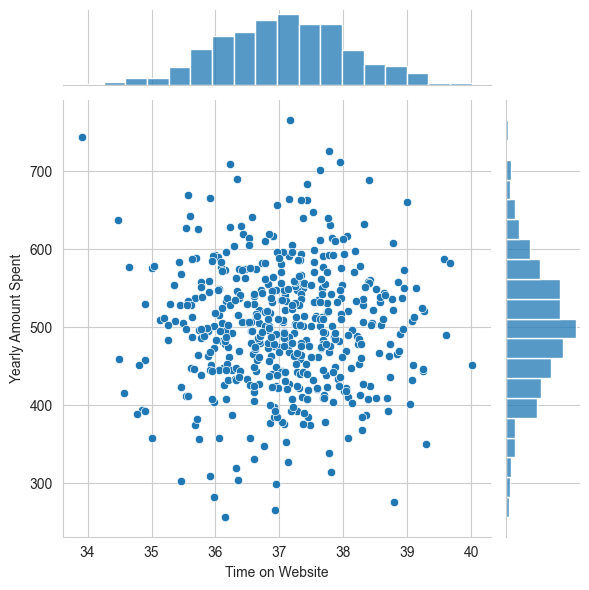

In [4]:
sns.jointplot(data = customers, x = 'Time on Website', y = 'Yearly Amount Spent')
plt.tight_layout()

Both variables seem to be (approximately) normally distributed on their own. There's a cluster in the center of the plot around the respective mean values. The density decreases as a point is considered farther away from the center. Based on this the two quantities seem to be pretty independent.

Let's compare the yearly amount spent with the time spent on the app.

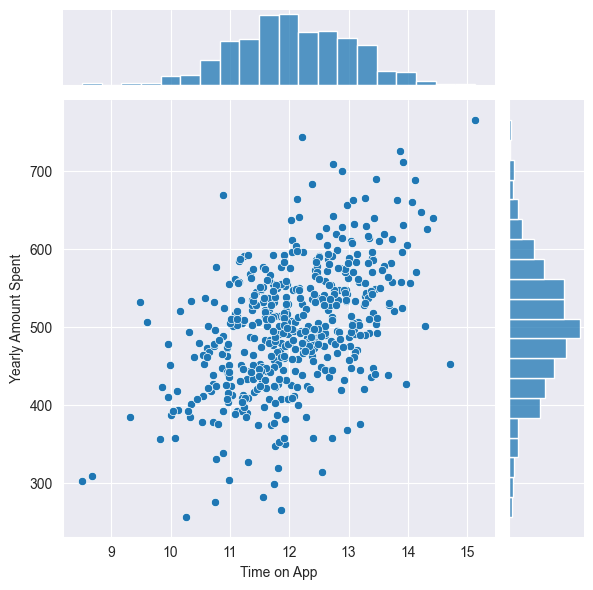

In [8]:
sns.jointplot(data = customers, x = 'Time on App', y = 'Yearly Amount Spent')

The time spent on the app is also approximately normally distributed. However, there is a clear positive correlation between time on the app and yearly spending. A preliminary (and rudimentary) takeaway is that the app is more important than the webite. Of course there are other features of the data we need to consider as well.

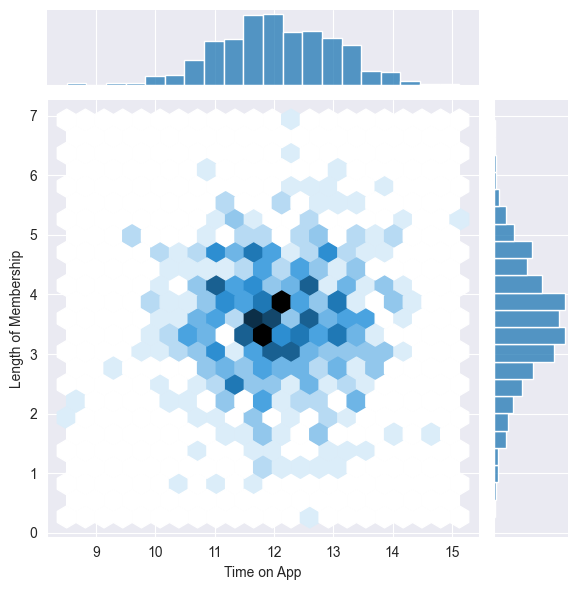

In [9]:
sns.jointplot(data = customers, x = 'Time on App', y = 'Length of Membership', kind='hex')

The comparison appears to roughly be a product of the individual distributions.

Let's see how all of the numerical variables compare to each other.

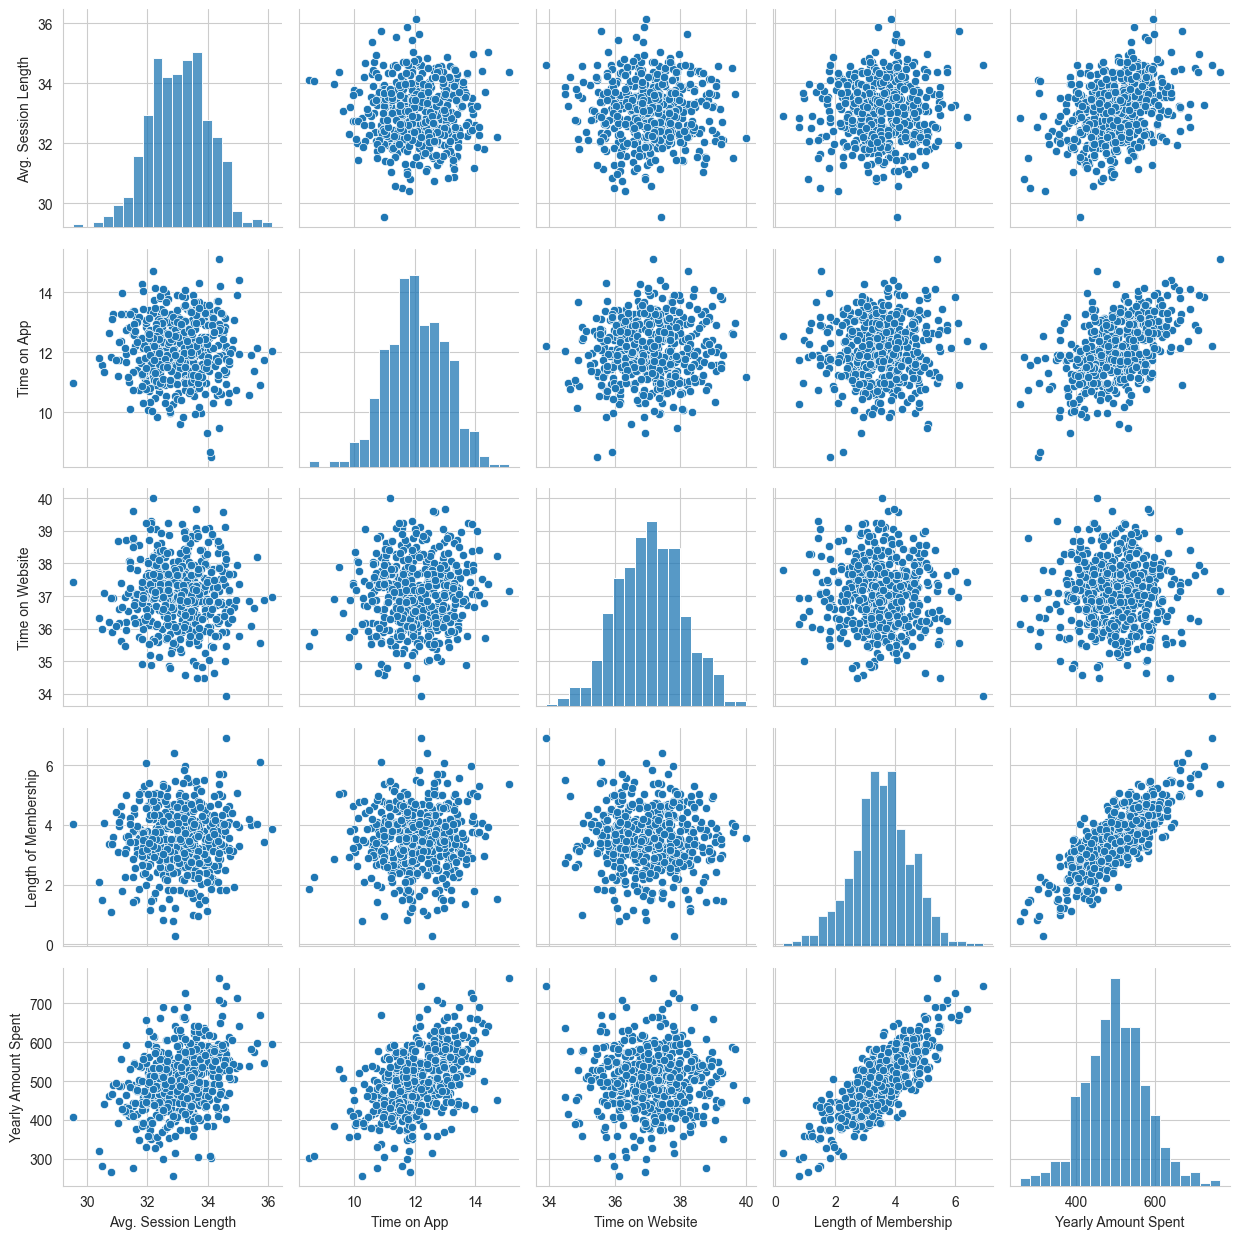

In [5]:
sns.pairplot(customers)
plt.tight_layout()

In [12]:
customers.corr(numeric_only=True)

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


<Axes: >

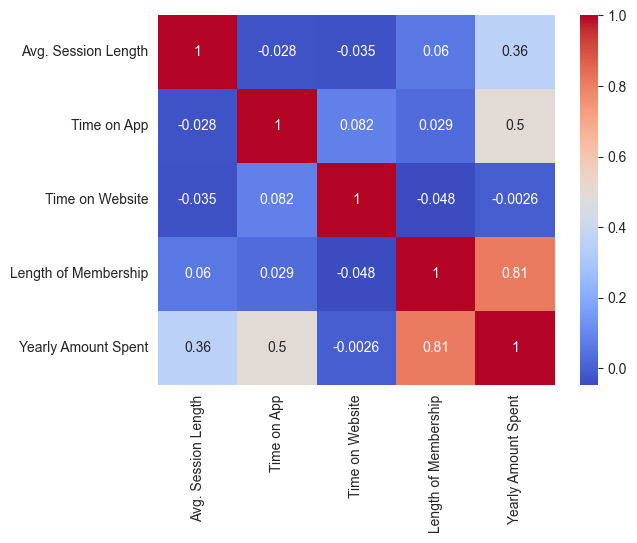

In [15]:
sns.heatmap(data=customers.corr(numeric_only=True), cmap='coolwarm', annot=True)

There are several notable correlations here. We have already seen that yearly amount spent and time on app are positively correlated. Now we see that average session length is also correlated positively with yearly amount spent. The most striking relationship is between length of membership and yearly amount spent.

It's curious that neither time on app nor time on website is correlated with average session length. This would probably warrant some clarification about how that data is obtained.

Let's investigate the strongly correlated pairing:

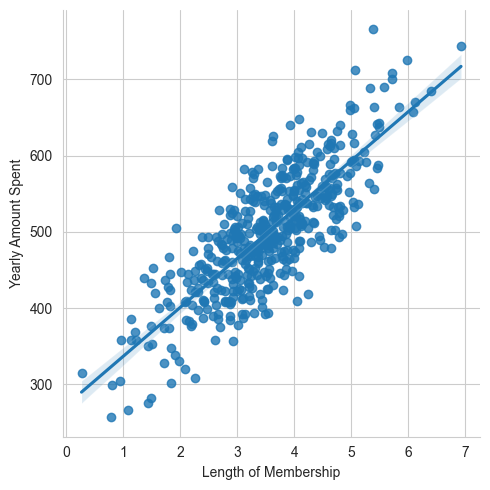

In [8]:
sns.lmplot(data = customers, x = 'Length of Membership', y = 'Yearly Amount Spent')
plt.tight_layout()

We'll also have a look at the two other positive correlations.

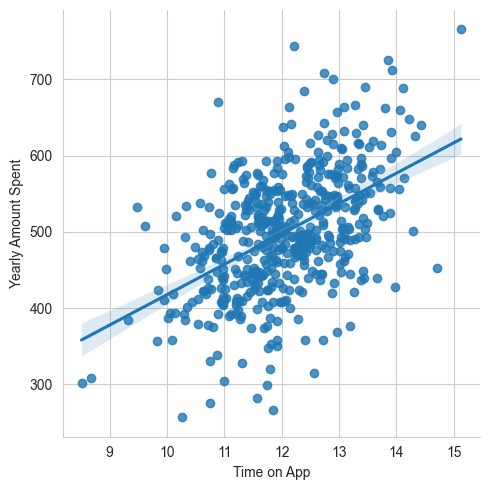

In [10]:
sns.lmplot(data = customers, x = 'Time on App', y = 'Yearly Amount Spent')
plt.tight_layout()

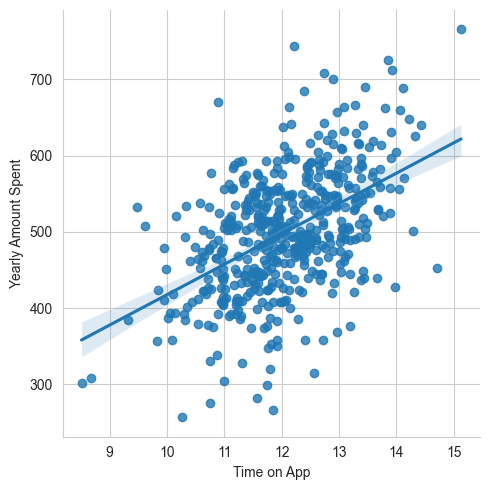

In [11]:
sns.lmplot(data = customers, x = 'Time on App', y = 'Yearly Amount Spent')
plt.tight_layout()

____
## Preparing Data For Regression

Now we'll set up the data to train a simple linear regression model. Our objective is to predict yearly amount spent, so we can understand what factors influence it most. That could give us some insight into how to boost sales.

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

In [13]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

We're choosing to only consider the numeric variables.

In [31]:
numeric_vars = ['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']
X = customers[numeric_vars]
y = customers['Yearly Amount Spent']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=101)

Now let's build a pipeline for convenience. We'll use it to scale the data and then perform regression.

In [23]:
reg_model_pipe = make_pipeline(StandardScaler(), LinearRegression())

____
## Training the Model

In [24]:
reg_model_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

We can view the coefficients of the model, which tell us the partial derivatives with respect to each input variable. This gives us a sense of how important each variable is to the model.

In [39]:
for var, coef in zip(numeric_vars, reg_model_pipe.named_steps['linearregression'].coef_):
        print(f'{var} Coefficient: ', coef)

Avg. Session Length Coefficient:  25.66544856782704
Time on App Coefficient:  35.701608078858776
Time on Website Coefficient:  -0.1651225652063468
Length of Membership Coefficient:  60.46239901925794


These check out with our exploratory analysis earlier: we knew the most positively correlated variable is length of membership, and we knew that average session length and time on app were correlated about the same amount.

____
## Predicting Test Data
Now that we have fit our model, we can evaluate its performance by predicting off the test values.

In [40]:
prediction = reg_model_pipe.predict(X_test)

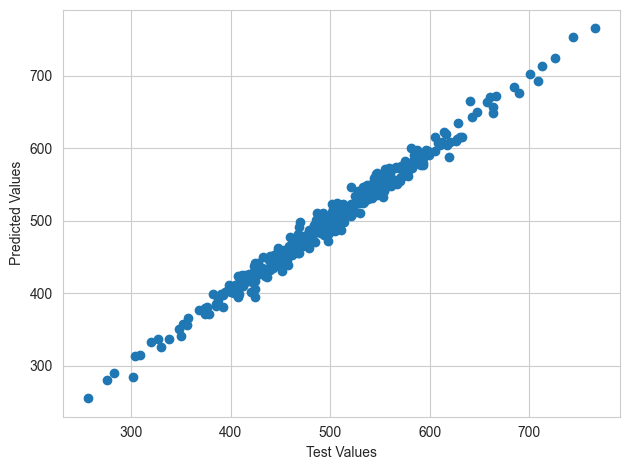

In [43]:
plt.scatter(x = y_test, y = prediction)
plt.xlabel('Test Values')
plt.ylabel('Predicted Values')
plt.tight_layout()

Ideally this would be a perfectly straight line, but this is pretty good.

____
## Evaluating Model Performance

We will compare the standard errors: mean absolute error, mean squared error, and root mean squared error. We will also look at the $R^2$ value of our plot.

In [44]:
from sklearn import metrics

In [48]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))
print('R^2:', metrics.r2_score(y_test, prediction))

MAE: 7.64689711362161
MSE: 93.97077001587996
RMSE: 9.693852176296065
R^2: 0.9858886608945469


In [50]:
print('Mean Yearly Amount Spent:', customers['Yearly Amount Spent'].mean())

Mean Yearly Amount Spent: 499.31403825859053


In [52]:
print(100*np.sqrt(metrics.mean_squared_error(y_test, prediction))/customers['Yearly Amount Spent'].mean())

1.9414339340636968


Our RMSE is about 2% of the mean value of the data we're trying to predict.

____
## Residuals

Our model performs quite well, as we can see based on the small percent error. Let's look a little closer at the shortcomings of our model.

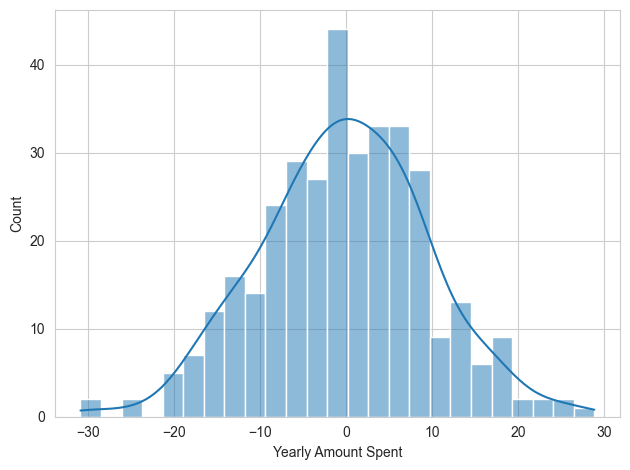

In [54]:
sns.histplot(prediction-y_test, kde=True, bins=25)
plt.tight_layout()

The distribution of the errors is normally distributed, which is good.

____
## Conclusion

This analysis is meant to study the yearly amount spent per customer at our ecommerce partner. We found that membership length is the current driving force in determining the amount spent. Based on our model, it's about twice as important as average session length or time on the app. The time on the website has comparitively no impact on the amount spent.

In [55]:
coeff_df = pd.DataFrame(reg_model_pipe.named_steps['linearregression'].coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Session Length,25.665449
Time on App,35.701608
Time on Website,-0.165123
Length of Membership,60.462399


The broadest recommendation that can be made is:
* Maintain or improve membership length
* Maintain or improve the app experience to keep users engaged
* Improve the website experience